In [1]:
import pathlib
import Utils
import TempoRandomizer
import DynamicsRandomizer
import pretty_midi
import numpy as np
from hashlib import sha256

Midi duration: 384.8636363636363


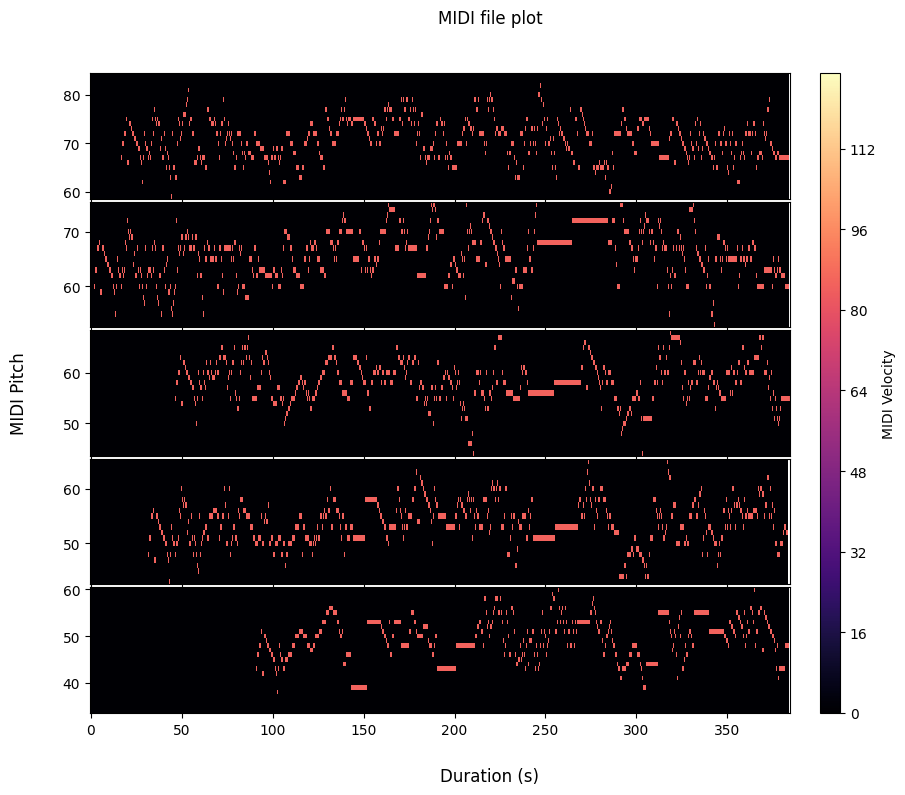

In [2]:
parent_dir = pathlib.Path('/Users/jaimegarcia/Desktop/BBCSO')
midi_dir = parent_dir / 'MIDI'
# import midi file
midi_filepath = midi_dir / 'RWC' / 'RM-C012.MID'
midi_data = pretty_midi.PrettyMIDI(str(midi_filepath))
new_midi = pretty_midi.PrettyMIDI()
new_midi.instruments = midi_data.instruments[1::]
midi_data = new_midi
print(f'Midi duration: {midi_data.get_end_time()}')
Utils.plotMIDI(midi_data)

Seed: 115705411449949925928592541987256848003337257063824981955780850273562723232082
Tempo changes start at (seconds): 
[[  0.        ]
 [ 69.97502114]
 [112.73671581]
 [124.39860839]
 [151.61178106]
 [221.58736351]
 [252.68870989]
 [338.21448171]
 [380.97612489]]
New tempos (BPM):
 [[119.99996374]
 [102.96385877]
 [146.84190708]
 [134.96471821]
 [109.91626332]
 [ 81.86725381]
 [142.52482258]
 [116.81666925]
 [ 80.64      ]]
New midi duration: 388.11898202807294


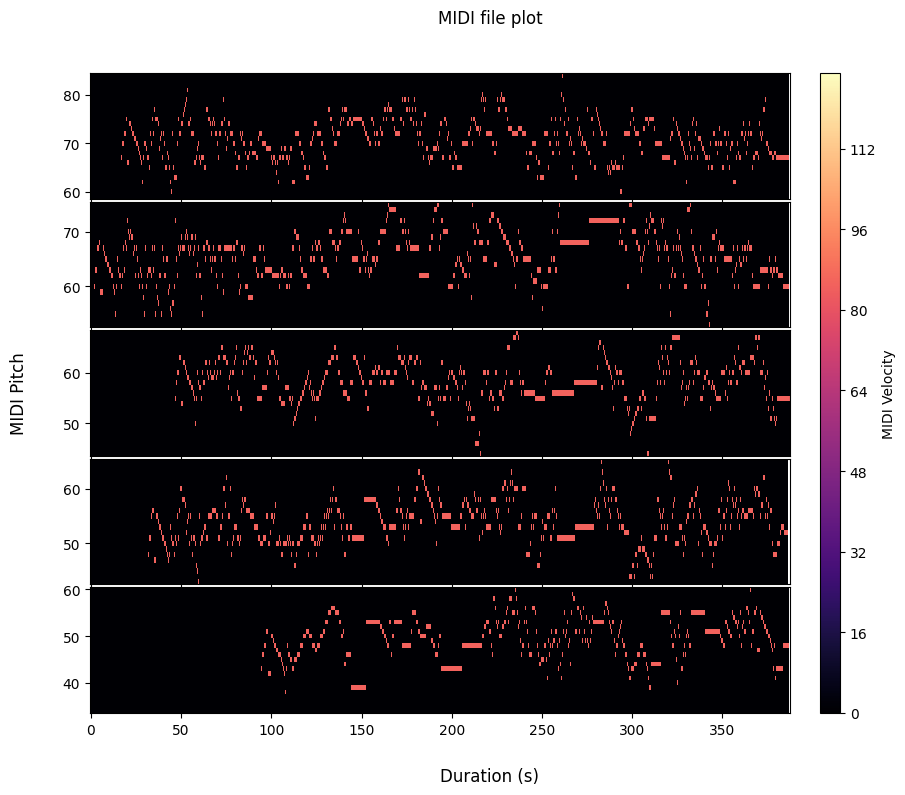

In [3]:
# compute seed
seed = Utils.computeSeed(midi_filepath.stem)
print(f'Seed: {seed}')
# random tempo intervals
tempo_values, start_times= TempoRandomizer.getRandomTempoIntervals(seed,midi_data.get_end_time(),mean=120,deviation=30,
                        min_tempo_intervals=4,max_tempo_intervals=10)
TempoRandomizer.insertTempoChanges(midi_data,tempo_values,start_times)
# print tempo intervals
tempo_change_times, tempo = midi_data.get_tempo_changes()
print(f'Tempo changes start at (seconds): \n{np.array(tempo_change_times)[:,np.newaxis]}')
print(f'New tempos (BPM):\n {np.array(tempo)[:,np.newaxis]}')
print(f'New midi duration: {midi_data.get_end_time()}')
Utils.plotMIDI(midi_data)

0 segs:	mf
19.6 segs:	p
64.15 segs:	crescendo
69.15 segs:	mp
121.53 segs:	ppp
125.45 segs:	f
136.55 segs:	crescendo
153.55 segs:	fff
290.11 segs:	pp
312.55 segs:	crescendo
322.55 segs:	ff
325.39 segs:	f
372.44 segs:	ppp


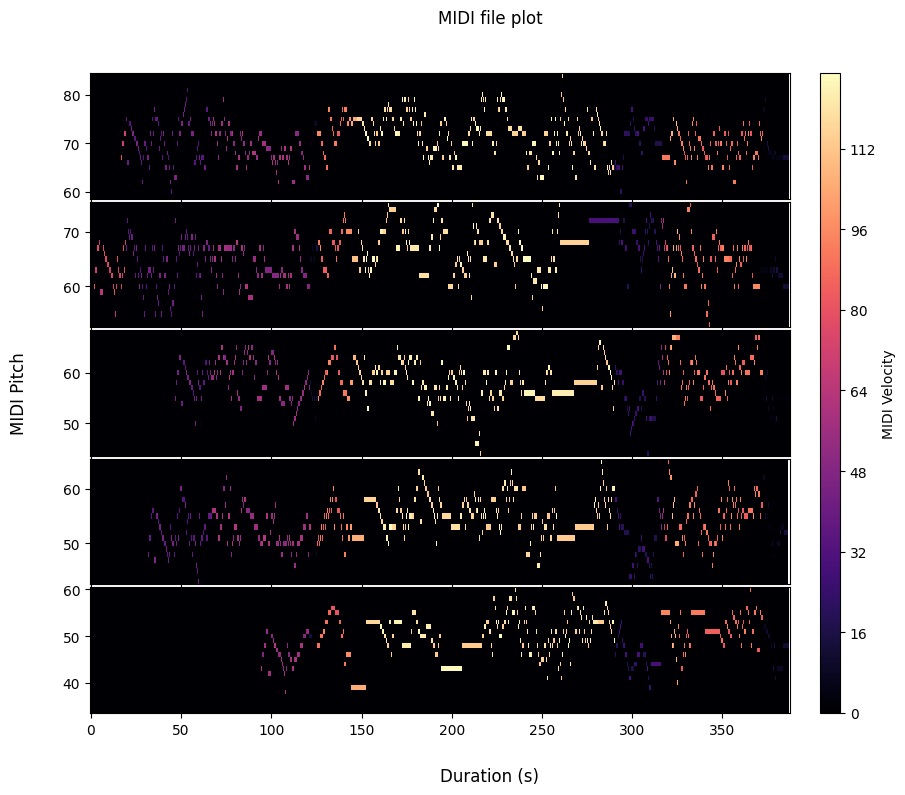

In [4]:
# random dynamic intervals
DynamicsRandomizer.insertDynamicIntervals(seed,midi_data)
Utils.plotMIDI(midi_data)